In [1]:
import numpy as np
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt

def load_model_and_image():
    """Load a pre-trained ViT model and a sample image."""
    # Load the model
    processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

    # Load a sample image
    url = "http://images.cocodataset.org/val2017/000000039769.jpg"
    raw_image = Image.open(requests.get(url, stream=True).raw)
    image = torch.tensor(np.array(raw_image)).permute(2, 0, 1)

    return processor, model, image

load_model_and_image()


/home/vscode/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(ViTImageProcessor {
   "do_convert_rgb": null,
   "do_normalize": true,
   "do_rescale": true,
   "do_resize": true,
   "image_mean": [
     0.5,
     0.5,
     0.5
   ],
   "image_processor_type": "ViTImageProcessor",
   "image_std": [
     0.5,
     0.5,
     0.5
   ],
   "resample": 2,
   "rescale_factor": 0.00392156862745098,
   "size": {
     "height": 224,
     "width": 224
   }
 },
 ViTForImageClassification(
   (vit): ViTModel(
     (embeddings): ViTEmbeddings(
       (patch_embeddings): ViTPatchEmbeddings(
         (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
       )
       (dropout): Dropout(p=0.0, inplace=False)
     )
     (encoder): ViTEncoder(
       (layer): ModuleList(
         (0-11): 12 x ViTLayer(
           (attention): ViTAttention(
             (attention): ViTSelfAttention(
               (query): Linear(in_features=768, out_features=768, bias=True)
               (key): Linear(in_features=768, out_features=768, bias=True)
               

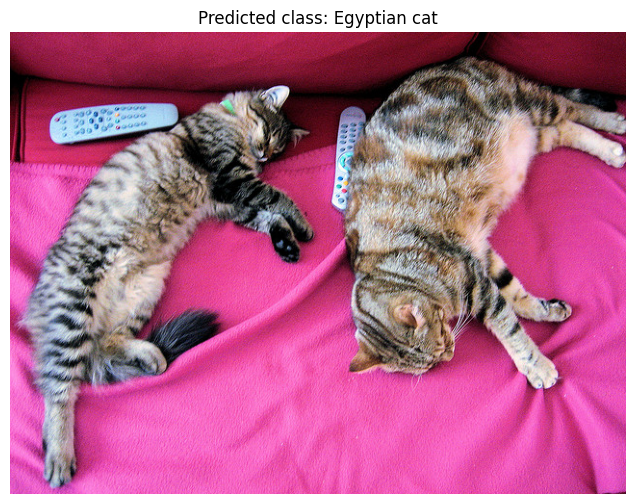

In [ ]:
def classify_image(processor, model, image):
    """
    Classify an image using the ViT model.

    Args:
        processor: ViT image processor
        model: ViT classification model
        image: Image tensor in CHW format

    Returns:
        predicted_class_idx: Index of predicted class
        predicted_class_name: Name of predicted class
    """
    # TODO: Process the image and get model predictions
    # - Use processor to prepare inputs
    #   - The processor takes in the image and returns a tensor with normalized pixel values that the model was trained on
    #   - It also crops/resizes the image to the expected input size
    inputs = processor(images=image, return_tensors="pt")
    # - Run the model to get logits
    outputs = model(**inputs)
    # - Find and return the predicted class index and name
    logits = outputs.logits
    # returns index of max value: logits.argmax(-1)
    predicted_class_idx = logits.argmax(-1).item()

    return predicted_class_idx, model.config.id2label[predicted_class_idx]


processor, model, image = load_model_and_image()
class_idx, class_name = classify_image(processor, model, image)

plt.figure(figsize=(8, 6))
plt.imshow(image.numpy().transpose(1, 2, 0).astype("uint8"))
plt.title(f"Predicted class: {class_name}")
plt.axis("off")
plt.show()

# Noise

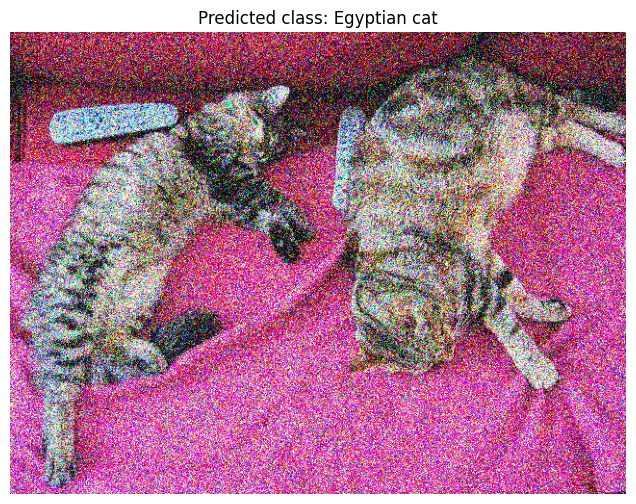

In [17]:
processor, model, image = load_model_and_image()

noise = torch.randn_like(image, dtype=torch.float32) * 100
attack = torch.clip(image + noise.int(), 0, 255)

class_idx, class_name = classify_image(processor, model, attack)

plt.figure(figsize=(8, 6))
plt.imshow(attack.numpy().transpose(1, 2, 0).astype("uint8"))
plt.title(f"Predicted class: {class_name}")
plt.axis("off")
plt.show()